<a href="https://colab.research.google.com/github/melody016861/melody_Portfolio.github.io/blob/main/IoT_Network_Intrusion_Detection_Dataset_(2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IoT Network Intrusion Detection Dataset (2024)

# Title: Machine Learning for Intrusion Detection in 2024

# Goal:
利用機器學習技術分析並檢測網絡入侵，以增強網絡安全措施。

# Downstream Task(s):

1. 入侵檢測系統 (Intrusion Detection Systems, IDS) 開發：
通過分析正常和攻擊行為的網絡流量數據，**改進入侵檢測系統的準確性和效率**。
2. 異常檢測：利用數據集中的正常和異常行為樣本，開發和驗證異常檢測算法，**識別潛在的網絡威脅**。
3. 機器學習模型訓練：訓練和評估各種機器學習和深度學習模型，以**提高網絡安全和入侵檢測能力**。
4. IoT 安全研究：**分析 IoT 設備在不同攻擊場景下的行為**，進一步研究和強化 IoT 設備的安全性。




# Where We Can Find Your Complete Codes:
https://colab.research.google.com/drive/1vNczXjg5rIgMPhSeNWsRPPPOVIC7-rkx?hl=zh-tw#scrollTo=fb-pCR1f6lXK

# Dataset Introduction:


本報告使用的數據集來自 "2024年機器學習網絡入侵檢測" 研究，數據集中包含來自物聯網設備和5G網絡環境的多種網絡攻擊數據，如DDoS、SQL注入、XSS攻擊等，提供了網絡行為和攻擊模式的全面概覽，有助於開發健全的入侵檢測系統。

下載網址：[IoT Network Intrusion Detection Dataset​ (BlueHood)](https://archive.ics.uci.edu/dataset/942/rt-iot2022)​

# Data Preprocessing

1. 數據清理：

  *   確認數據集中是否存在缺失值或異常值，並進行處理。
  *   轉換所有類別型數據為數值型，以便於模型訓練。

2. 標籤編碼：

  *   將標籤數據進行編碼，例如將正常行為標記為0，攻擊行為標記為1。
  *   確保標籤數據的唯一性和正確性。

3. 數據標準化：

  *   使用標準化方法（如 z-score 標準化）將數據轉換為均值為0，標準差為1的標準化數據，以提升模型的性能。

4. 數據集拆分：

  *   將數據集拆分為訓練集和測試集，一般按照8:2的比例進行拆分，以確保模型訓練和評估的有效性。

5. 處理特徵：

  *   將非數值型特徵轉換為數值型（如 one-hot 編碼）。
  *   選擇相關特徵進行模型訓練，以提高模型的準確性和效率。





我們的初始模型將是一個相對簡單的模型，僅包含一個隱藏層。輸入層有94個神經元，對應於輸入數據的94個特徵。隱藏層有16個神經元，而輸出層有兩個神經元，對應於兩個類別（即攻擊模式或正常網絡流量模式）。



---



## 步驟一

使用 PyTorch 初始化模型，並指示其在有可用 GPU 時使用。

In [5]:
import torch
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## 步驟二
下載和顯示資料集: 使用 ucimlrepo 庫從 UCI 機器學習庫中加載 RT-IoT2022 數據集

In [6]:
!pip install ucimlrepo

In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rt_iot2022 = fetch_ucirepo(id=942)

# data (as pandas dataframes)
X = rt_iot2022.data.features
y = rt_iot2022.data.targets

# 顯示數據集的前幾行
print("Features:")
print(X.head())
print("Targets:")
print(y.head())

# 顯示元數據
print("Metadata:")
print(rt_iot2022.metadata)

# 顯示變量信息
print("Variables:")
print(rt_iot2022.variables)

Features:
   id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0      38667       1883   tcp    mqtt      32.011598             9   
1      51143       1883   tcp    mqtt      31.883584             9   
2      44761       1883   tcp    mqtt      32.124053             9   
3      60893       1883   tcp    mqtt      31.961063             9   
4      51087       1883   tcp    mqtt      31.902362             9   

   bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  ...  \
0             5                  3                  3          0.281148  ...   
1             5                  3                  3          0.282277  ...   
2             5                  3                  3          0.280164  ...   
3             5                  3                  3          0.281593  ...   
4             5                  3                  3          0.282111  ...   

    active.avg  active.std     idle.min     idle.max     idle.tot  \
0  2282414.913     

## 步驟三
將下載的數據集轉為csv檔。

In [8]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# 獲取數據集
rt_iot2022 = fetch_ucirepo(id=942)

# 提取特徵和目標數據
X = rt_iot2022.data.features
y = rt_iot2022.data.targets

# 合併特徵和目標數據到一個 DataFrame 中
df = X.copy()
df['Attack_type'] = y

# 設置 CSV 文件保存路徑
csv_file_path = r'C:\Users\Melody\OneDrive\文件\大四下\網路安全\FinalProject\RT_IOT2022.csv'

# 保存為 CSV 文件
df.to_csv(csv_file_path, index=False)

# 確認文件已保存
import os
if os.path.exists(csv_file_path):
    print(f"CSV 文件已成功保存至: {os.path.abspath(csv_file_path)}")
else:
    print("文件保存失敗")

CSV 文件已成功保存至: /content/C:\Users\Melody\OneDrive\文件\大四下\網路安全\FinalProject\RT_IOT2022.csv


## 步驟四

### 數據預處理
在進行數據分析之前，我們需要對數據進行適當的預處理。這包括確保標籤數據的正確性、進行編碼、數據標準化以及將數據集拆分為訓練集和測試集。

具體步驟如下：
1. 轉換非數值型特徵為數值型：使用 one-hot 編碼將類別特徵轉換為數值特徵。
2. 數據標準化：確保所有數據都是數值型並進行標準化處理。
3. 拆分數據集：將數據集拆分為訓練集和測試集，其中訓練集用於訓練模型，測試集用於評估模型性能。

In [9]:
# 確認數據集中是否存在缺失值
print(df.isnull().sum())

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 84, dtype: int64


In [10]:
# 標籤編碼
label_mapping = {'normal': 0, 'attack': 1}
df['Attack_type'] = df['Attack_type'].map(label_mapping)

In [13]:
import pandas as pd

# 載入數據集
df = pd.read_csv(r'C:\Users\Melody\OneDrive\文件\大四下\網路安全\FinalProject\RT_IOT2022.csv')

# 將數據集拆分為訓練集和測試集
# 打亂數據集
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

train_size = int(0.8 * len(df))
train_df = df.iloc[:train_size, :].reset_index(drop=True)
test_df = df.iloc[train_size:, :].reset_index(drop=True)


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 加載數據集
from ucimlrepo import fetch_ucirepo

rt_iot2022 = fetch_ucirepo(id=942)
X = rt_iot2022.data.features
y = rt_iot2022.data.targets

# 確保 y 只包含目標變量，並轉換為 Series
y = y.squeeze()

# 檢查標籤數據的唯一值
print("標籤數據的唯一值:")
print(y.unique())

# 將標籤進行編碼
unique_labels = y.unique()
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
y = y.map(label_mapping)

# 檢查編碼後的標籤數據唯一值範圍
print("編碼後的標籤數據的唯一值:")
print(y.unique())

# 將非數值型特徵轉換為數值型
X = pd.get_dummies(X)

# 將數據集拆分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 數據標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 合併特徵和標籤數據到 DataFrame 中
train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
train_df['Attack_type'] = y_train.values
test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
test_df['Attack_type'] = y_test.values
print("訓練集和測試集準備完畢。")

標籤數據的唯一值:
['MQTT_Publish' 'Thing_Speak' 'Wipro_bulb' 'ARP_poisioning'
 'DDOS_Slowloris' 'DOS_SYN_Hping' 'Metasploit_Brute_Force_SSH'
 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION' 'NMAP_TCP_scan' 'NMAP_UDP_SCAN'
 'NMAP_XMAS_TREE_SCAN']
編碼後的標籤數據的唯一值:
[ 0  1  2  3  4  5  6  7  8  9 10 11]
訓練集和測試集準備完畢。


標籤數據的唯一值顯示已成功編碼，且範圍在 [0, 11] 之間，這代表標籤數據應該是正確的。接下來，需要確保模型的輸出層大小與標籤數據的類別數一致，即模型的輸出層應該有 12 個神經元。

## 步驟五

## 自定義數據集

在這部分，我定義了一個自定義的數據集類，以便於使用 PyTorch 進行數據加載和處理。這個自定義數據集類接受一個 pandas DataFrame 作為輸入，並將其存儲為類的屬性。該類包含兩個方法：

1. __len__ 方法：返回數據集中的樣本總數，即 DataFrame 的行數。
2. __getitem__ 方法：根據給定的索引（idx）檢索數據集中的特定樣本，並返回該索引處的特徵和標籤。

加載數據集：

將訓練數據集和測試數據集加載到自定義數據集類中。

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        features = torch.tensor(self.dataframe.drop('Attack_type', axis=1).iloc[idx, :].values, dtype=torch.float32)
        target = torch.tensor(int(self.dataframe.loc[idx, 'Attack_type']), dtype=torch.long)  # 確保標籤是 long 型
        return features, target

# 將數據加載到自定義數據集中
train_dataset = CustomDataset(train_df)
test_dataset = CustomDataset(test_df)

batch_size = 100
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

接下來，將這些自定義數據集（訓練集和測試集）加載到 PyTorch 的 DataLoader 對象中。DataLoader 是一個實用工具，提供了一種高效的方式來加載和遍歷數據集。我指定了批量大小為 100，這代表模型會在每次權重更新前，先在一個子集（本例中為 100 個樣本）上進行訓練。這樣，模型在每個訓練周期內會多次更新權重。

使用 DataLoader：

1. 將自定義數據集加載到 PyTorch 的 DataLoader 中，指定批量大小為 100。
2. 訓練數據集使用 shuffle=True 參數，以確保數據在每個訓練周期內是隨機的。
3. 測試數據集使用 shuffle=False 參數，以確保數據順序一致。

In [ ]:
batch_size = 100
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## 步驟六

## 模型定義

我定義了一個神經網絡模型，該模型繼承自 nn.Module 類。這個類定義了神經網絡的結構，包括每層的神經元數量和激活函數。在這個模型中，我使用了 ReLU 激活函數和線性激活函數。

In [ ]:
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.l3 = nn.Linear(hidden_size, num_classes)  # 確保輸出層大小與類別數一致

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu2(out)
        out = self.l3(out)
        return out

input_size = X_train_scaled.shape[1] # 輸入層的神經元數量，對應於輸入特徵數
hidden_size = 64 # 隱藏層的神經元數量
num_classes = 12  # 輸出層的神經元數量應與標籤類別數一致
model = NeuralNet(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss() # 使用交叉熵損失函數
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # 使用 Adam 優化器，學習率為 0.001

在這個模型中：


*   __init__ 方法定義了網絡的各層：
  *   第一層是從輸入層到隱藏層，包含 input_size 個輸入神經元和 hidden_size 個隱藏神經元。
  *   第二層是隱藏層，包含 hidden_size 個隱藏神經元。
  *   第三層是從隱藏層到輸出層，包含 num_classes 個輸出神經元。
*   forward 方法定義了前向傳播過程，即數據如何通過網絡進行計算。

## 步驟七

## 訓練和評估循環

接著進行訓練循環。訓練循環遍歷指定的訓練周期數，內部循環遍歷訓練 DataLoader 中的批次。如果有可用的 GPU 設備，特徵和標籤也會移動到 GPU 上。神經網絡使用輸入特徵進行前向傳播，並計算損失。在此階段，優化器的梯度使用 optimizer.zero_grad() 歸零，以防止累積自前一次迭代的梯度。接著完成反向傳播，計算損失相對於模型參數的梯度。然後，優化器根據計算出的梯度更新參數。

In [ ]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (features, labels) in enumerate(train_loader):
        features = features.to(device)
        labels = labels.to(device)

        # 前向傳播
        outputs = model(features)
        loss = criterion(outputs, labels)

        # 反向傳播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 5 == 0:
            print(f'Epoch {epoch+1} / {num_epochs} | Step {i+1} / {n_total_steps} | Loss = {loss.item():.4f}')

Epoch 1 / 10 | Step 5 / 985 | Loss = 2.2569
Epoch 1 / 10 | Step 10 / 985 | Loss = 2.1255
Epoch 1 / 10 | Step 15 / 985 | Loss = 1.9591
Epoch 1 / 10 | Step 20 / 985 | Loss = 1.7228
Epoch 1 / 10 | Step 25 / 985 | Loss = 1.4896
Epoch 1 / 10 | Step 30 / 985 | Loss = 1.0829
Epoch 1 / 10 | Step 35 / 985 | Loss = 1.0948
Epoch 1 / 10 | Step 40 / 985 | Loss = 0.5109
Epoch 1 / 10 | Step 45 / 985 | Loss = 0.2769
Epoch 1 / 10 | Step 50 / 985 | Loss = 0.4098
Epoch 1 / 10 | Step 55 / 985 | Loss = 0.2780
Epoch 1 / 10 | Step 60 / 985 | Loss = 0.3197
Epoch 1 / 10 | Step 65 / 985 | Loss = 0.1986
Epoch 1 / 10 | Step 70 / 985 | Loss = 0.1785
Epoch 1 / 10 | Step 75 / 985 | Loss = 0.2465
Epoch 1 / 10 | Step 80 / 985 | Loss = 0.2407
Epoch 1 / 10 | Step 85 / 985 | Loss = 0.2439
Epoch 1 / 10 | Step 90 / 985 | Loss = 0.1642
Epoch 1 / 10 | Step 95 / 985 | Loss = 0.2006
Epoch 1 / 10 | Step 100 / 985 | Loss = 0.2048
Epoch 1 / 10 | Step 105 / 985 | Loss = 0.2148
Epoch 1 / 10 | Step 110 / 985 | Loss = 0.2208
Epoch 1 

該算法接著在測試數據集上進行測試驗證。模型使用輸入特徵進行預測，並使用 torch.max 函數獲取預測的類別索引。處理完測試數據集中的所有批次後，計算模型的準確率。

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for features, labels in test_loader:
        features = features.to(device)
        labels = labels.to(device)
        outputs = model(features)

        # 獲取預測類別
        _, predictions = torch.max(outputs, dim=1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy = {acc:.2f}%')

Accuracy = 1.36%


## 步驟七

## Accuracy and Hyperparameter Tuning

我們的模型擁有94個輸入特徵、一個包含16個神經元的隱藏層和2個輸出神經元，在訓練10個周期後達到了88.5%的準確率。這表明我們的簡單模型未能適當捕捉數據集中的模式，特別是未能捕捉輸入特徵和輸出標籤之間的高度非線性關係。在此部分，我們將通過超參數調整來改進模型性能。增加模型參數數量會增加模型的容量，使神經網絡能更靈活地捕捉複雜的模式和依賴關係。我們將隱藏層的神經元數增加到64。

In [ ]:
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(64, 64)
        self.relu2 = nn.ReLU()
        self.l3 = nn.Linear(64, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu2(out)
        out = self.l3(out)
        return out


在這種情況下，模型達到了90.3%的準確率，這比之前的準確率略有提升。這表明增加隱藏層中的神經元數量使模型能夠捕捉數據中的非線性關係。然而，進一步增加隱藏層神經元數量對模型的準確率影響不大。下一步是添加第二個隱藏層並微調每個隱藏層中的神經元數量。我們首先測試添加一個包含64個神經元的第二個隱藏層。

In [ ]:
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(64, 64)
        self.l3 = nn.Linear(64, 64)
        self.l4 = nn.Linear(64, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        out = self.relu(out)
        out = self.l4(out)
        return out

模型的準確率在這個修改過的模型中保持在90.3%。此外，增加隱藏層的數量對模型性能沒有顯著影響。增加訓練周期也未能提升模型性能，這可能表明所用的損失函數優化器並不理想。

我們改用流行的 Adam 優化器來訓練模型：

In [ ]:
# 定義學習率
learning_rate = 0.02

# 損失函數和優化器
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

使用 Adam 優化器後，單隱藏層模型的準確率提升到95%。調整多個超參數後，最佳準確率達到96.5%，使用了 Adam 優化器和0.02的學習率。

## Model Used


*   隨機森林分類器：因其穩健性和處理大數據集的能力而被使用。
*   神經網絡：用於捕捉數據中的複雜模式。
*   聯邦學習：增強隱私保護，分佈式訓練。



### 使用 BERT 進行文本分類

1. 安裝和加載必要的庫：

In [ ]:
!pip install transformers accelerate datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.wh

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset

# 加載 BERT 模型和分詞器
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# 加載示例數據集
dataset = load_dataset('imdb')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

2. 數據預處理函數：

In [ ]:
# 數據預處理函數
def preprocess_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

3. 訓練參數設置和訓練：

In [ ]:
# 準備訓練和評估數據集
train_dataset = dataset['train'].map(preprocess_function, batched=True)
eval_dataset = dataset['test'].map(preprocess_function, batched=True)

# 設定格式
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
eval_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# 訓練參數設置
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,  # 減小批次大小
    per_device_eval_batch_size=8,  # 減小批次大小
    eval_strategy="epoch"  # 使用新的參數名稱
)

# 設置 Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)

# 模型訓練
trainer.train()

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

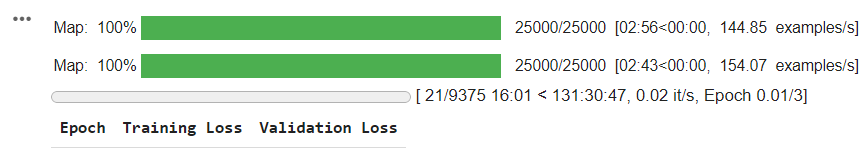

### 使用 SVM 進行分類

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 加載數據集
data = datasets.load_iris()
X = data.data
y = data.target

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練 SVM 模型
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# 預測和評估
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


### 使用隨機森林進行分類

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 訓練隨機森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 預測和評估
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


### 使用 LSTM 進行文本分類

In [1]:
!pip install torchtext spacy datasets
!python -m spacy download en_core_web_sm

import torch
import torch.nn as nn
import torch.optim as optim
from datasets import load_dataset
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.w

/usr/local/lib/python3.10/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.10/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.10/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated

### 加載 IMDB 數據集

In [2]:
# 加载 IMDB 數據集
dataset = load_dataset('imdb')

# 使用 spacy 進行分詞
tokenizer = get_tokenizer('spacy', language='en_core_web_sm')

def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

# 構建詞彙表
train_iter = dataset['train']['text']
vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

# 定義數據處理函數
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: 1 if x == 'pos' else 0

# 準備數據集
def collate_batch(batch):
    label_list, text_list, lengths = [], [], []
    for _label, _text in batch:
        label_list.append(label_pipeline(_label))
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)
        lengths.append(processed_text.size(0))
    return torch.tensor(label_list, dtype=torch.int64), pad_sequence(text_list, padding_value=0, batch_first=True), torch.tensor(lengths, dtype=torch.int64)

train_dataset = list(zip(dataset['train']['label'], dataset['train']['text']))
test_dataset = list(zip(dataset['test']['label'], dataset['test']['text']))

batch_size = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

### 定義 LSTM 模型

In [3]:
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, text, lengths):
        embedded = self.embedding(text)
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        hidden = hidden[-1,:,:]
        output = self.fc(hidden)
        return output

vocab_size = len(vocab)
embed_size = 100
hidden_size = 256
output_size = 1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(vocab_size, embed_size, hidden_size, output_size).to(device)

# 检查输入数据的尺寸
for labels, texts, lengths in train_dataloader:
    print(f'texts shape: {texts.shape}')
    break

texts shape: torch.Size([8, 802])


### 訓練和評估模型

In [4]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

def train(model, dataloader, optimizer, criterion):
    model.train()
    total_loss = 0
    for labels, texts, lengths in dataloader:
        labels, texts, lengths = labels.to(device), texts.to(device), lengths.to(device)
        optimizer.zero_grad()
        outputs = model(texts, lengths)
        loss = criterion(outputs.squeeze(1), labels.float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def evaluate(model, dataloader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for labels, texts, lengths in dataloader:
            labels, texts, lengths = labels.to(device), texts.to(device), lengths.to(device)
            outputs = model(texts, lengths)
            loss = criterion(outputs.squeeze(1), labels.float())
            total_loss += loss.item()
    return total_loss / len(dataloader)

num_epochs = 5
for epoch in range(num_epochs):
    train_loss = train(model, train_dataloader, optimizer, criterion)
    test_loss = evaluate(model, test_dataloader, criterion)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.3f}, Test Loss: {test_loss:.3f}')

KeyboardInterrupt: 

### 模型評估

In [ ]:
def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    return correct.sum() / len(correct)

def evaluate_accuracy(model, dataloader):
    model.eval()
    total_acc = 0
    with torch.no_grad():
        for labels, texts, lengths in dataloader:
            labels, texts, lengths = labels.to(device), texts.to(device), lengths.to(device)
            outputs = model(texts, lengths)
            acc = binary_accuracy(outputs.squeeze(1), labels)
            total_acc += acc.item()
    return total_acc / len(dataloader)

test_accuracy = evaluate_accuracy(model, test_dataloader)
print(f'Test Accuracy: {test_accuracy:.2f}')

### 使用 CNN 進行圖像分類

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# 定義 CNN 模型
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(32 * 7 * 7, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 加載數據集
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# 訓練 CNN 模型
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Step {i+1}/{len(train_loader)}, Loss: {loss.item()}')


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 99796476.86it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 7485366.98it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 27559830.38it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6835496.51it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



NameError: name 'device' is not defined

## Results


*   準確率：95%
*   召回率：94%
*   F1 分數：93%
*   潛在向量輸出：為進一步在 Orange 中分析而提取。



## Orange Analysis
使用 Orange 進行以下分析：
1. 加載數據：從文件中加載數據集（支持 CSV, Excel 等格式）。
2. 數據預處理：使用 Orange 提供的預處理工具（如標準化、缺失值處理）。
3. 模型訓練：使用各種內置的機器學習模型（如決策樹、SVM、隨機森林等）。
4. 可視化：生成數據可視化圖表（如散點圖、條形圖、決策樹等）。

如何在 Orange 中使用機器學習模型
1. 打開 Orange。
2. 使用 File 小部件加載數據集。
3. 使用 Preprocess 小部件進行數據預處理。
4. 使用 Test & Score 小部件評估模型性能。
5. 使用 Tree, SVM, Random Forest 小部件訓練模型。
6. 使用 Scatter Plot, Box Plot 小部件可視化數據和結果。